# 1. Install and import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.2 MB/s eta 0:00:00


# 2. Download data 

In [4]:
import numpy as np
from datasets import load_dataset

# Load the dataset with the `2m_first_5k` subset
# we need to download dataset every time, so do not use random!
# use '2m_first_5k' for the consistency among the models
# it takes about 3 min to download
dataset = load_dataset('poloclub/diffusiondb', '2m_first_5k')

Generating train split: 0 examples [00:00, ? examples/s]

Dataset diffusiondb downloaded and prepared to /root/.cache/huggingface/datasets/poloclub___diffusiondb/2m_first_5k/0.9.1/547894e3a57aa647ead68c9faf148324098f47f2bc1ab6705d670721de9d89d1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
my_5k_data = dataset['train']
df = pd.DataFrame( my_5k_data ) # this will take about 3 min too
df.head()

,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512,768,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512,640,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512,768,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512,768,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640,512,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516


In [6]:
df['id'] = df.index
first_column = df.pop('id')
df.insert(0, 'id', first_column)
df.head()

,id,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512,768,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793
1,1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512,640,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090
2,2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512,768,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533
3,3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512,768,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597
4,4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640,512,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516


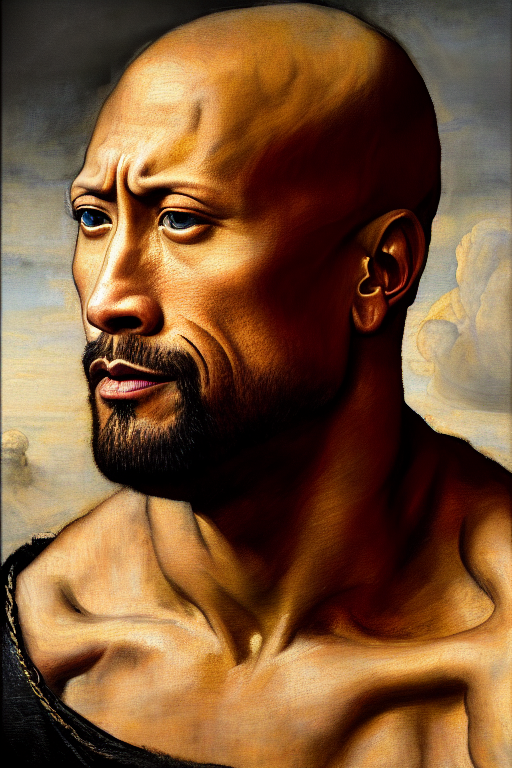

In [7]:
image = df['image'][0]
image

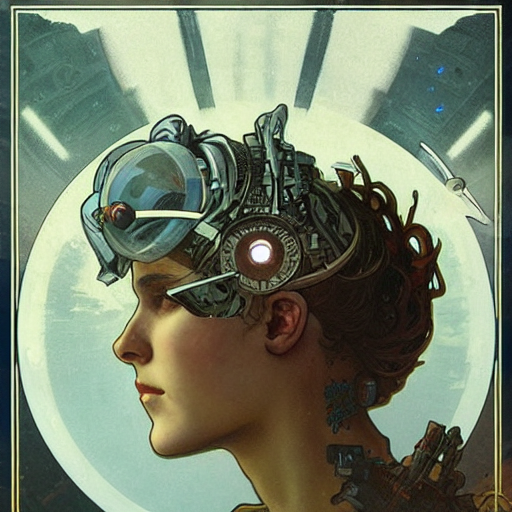

In [8]:
image_random = df['image'][3845]
image_random

# 2. Save the data as csv file

In [ ]:
df.to_csv('Hyelim_5k.csv')

#3. Shahbaz downloading the images for his model and group use 

In [ ]:
df_temp = pd.read_csv('Hyelim_5k.csv');
df_temp.head()

,Unnamed: 0,id,image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,0,0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512,768,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793
1,1,1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512,640,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090
2,2,2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512,768,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533
3,3,3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512,768,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597
4,4,4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640,512,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516


In [ ]:
print(df['image'][0])

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x768 at 0x7FD40058F100>


In [ ]:
import requests

In [ ]:
type(df['image'][0])

PIL.PngImagePlugin.PngImageFile

In [ ]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [ ]:
import sys, os
from PIL import Image
import tqdm


In [ ]:
## navigate to relevant directory where I want to store all images
%cd Images_all
%ls

/content/Images_all


In [ ]:
## test to see if image is saved as desired
image.save('test.png', 'PNG')

In [ ]:
## for each item in dataFrame df, get image --> save as image file in folder
for i in range(len(df)):
  ## isolate image section from row
  temp_im = df.iloc[i]['image'];
  #print(temp_im)
  ## store image in the given filename format
  f_name = 'im_in_' + str(i) + '.png'
  temp_im.save(f_name, 'PNG');
  print ('Processed image: ',str(i) ,'/', len(df));

Processed image:  0 / 5000
Processed image:  1 / 5000
Processed image:  2 / 5000
Processed image:  3 / 5000
Processed image:  4 / 5000
Processed image:  5 / 5000
Processed image:  6 / 5000
Processed image:  7 / 5000
Processed image:  8 / 5000
Processed image:  9 / 5000
Processed image:  10 / 5000
Processed image:  11 / 5000
Processed image:  12 / 5000
Processed image:  13 / 5000
Processed image:  14 / 5000
Processed image:  15 / 5000
Processed image:  16 / 5000
Processed image:  17 / 5000
Processed image:  18 / 5000
Processed image:  19 / 5000
Processed image:  20 / 5000
Processed image:  21 / 5000
Processed image:  22 / 5000
Processed image:  23 / 5000
Processed image:  24 / 5000
Processed image:  25 / 5000
Processed image:  26 / 5000
Processed image:  27 / 5000
Processed image:  28 / 5000
Processed image:  29 / 5000
Processed image:  30 / 5000
Processed image:  31 / 5000
Processed image:  32 / 5000
Processed image:  33 / 5000
Processed image:  34 / 5000
Processed image:  35 / 5000
Pr

In [ ]:
## zip files and make google auto-download it once its done zipping (it takes a while to zip and takes a while to download)
## this was taking too long so I also adopted other retention strategies within colab-mount env
%cd ..
!zip -r /content/Hyelim_first_5k_images_all.zip /content/Hyelim_first_5k_images
files.download('Hyelim_first_5k_images_all.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/Hyelim_first_5k_images/im_in_1589.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_835.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_2857.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_1857.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_1151.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_4786.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_2205.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_2324.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_1080.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_1432.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_769.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_4708.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/im_in_4855.png (deflated 0%)
  adding: content/Hyelim_first_5k_images/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns

Index(['id', 'image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width',
       'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
      dtype='object')

In [ ]:
df['id']

0          0
1          1
2          2
3          3
4          4
        ... 
4995    4995
4996    4996
4997    4997
4998    4998
4999    4999
Name: id, Length: 5000, dtype: int64

In [ ]:
## navigate to desired folder
%cd Hyelim_first_5k_images/

/content/Hyelim_first_5k_images


In [ ]:
## copy zipped file to my drive;
## This worked better than files downloader!!
!cp Hyelim_first_5k_images_all.zip /content/drive/MyDrive/

In [ ]:
# mount drive to check if files were copied, etc.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 4. Create dataframe with image path 

In [10]:
df1 = df.copy()

# drop the image column
df1.drop(columns = ['image'], axis = 1, inplace = True)
df1.head()

,id,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
0,0,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512,768,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793
1,1,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512,640,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090
2,2,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512,768,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533
3,3,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512,768,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597
4,4,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640,512,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516


In [14]:
parent_path = '/content/drive/MyDrive/prompt_recc/Hyelim_first_5k_images/'

def create_img_path(row):
  return parent_path + 'img_in_' + str(row[0]) + '.png'

df1['image_path'] = df1.apply(create_img_path, axis = 1)
df1.head()

,id,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw,image_path
0,0,"a renaissance portrait of dwayne johnson, art ...",2480545905,50,16.0,k_euler_ancestral,512,768,e9dfc969d22cb9c5621ad075b3826c28f18ef3840c6dda...,2022-08-20 05:28:00+00:00,0.163488,0.000793,/content/drive/MyDrive/prompt_recc/Hyelim_firs...
1,1,"portrait of a dancing eagle woman, beautiful b...",2250159284,50,9.0,k_lms,512,640,aa60a36693bf9e079b421c1200fd42ed94061fb02078ad...,2022-08-20 05:28:00+00:00,0.276650,0.003090,/content/drive/MyDrive/prompt_recc/Hyelim_firs...
2,2,"epic 3 d, become legend shiji! gpu mecha contr...",4292948605,50,7.0,k_lms,512,768,3e774662f24c78b0590d57365d755d7dacde8f33dbdc56...,2022-08-20 05:28:00+00:00,0.090421,0.000533,/content/drive/MyDrive/prompt_recc/Hyelim_firs...
3,3,an airbrush painting of cyber war machine scen...,2374713726,50,12.0,k_lms,512,768,c2bd0b60caa0aa04d0a7e5972fefc60b21ece352d88353...,2022-08-20 05:29:00+00:00,0.078309,0.000597,/content/drive/MyDrive/prompt_recc/Hyelim_firs...
4,4,concept art of a silent hill monster. painted ...,2320897141,50,6.0,k_lms,640,512,08ac4153ab7e13baa55ee74213eb117a29a0024267b29e...,2022-08-20 05:29:00+00:00,0.086802,0.083516,/content/drive/MyDrive/prompt_recc/Hyelim_firs...


In [15]:
df1.to_csv("prompt_with_img_path.csv", index = False)